In [1]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Loading the Dataset
file_path = 'synthetic_wedm_data.csv'
df = pd.read_csv(file_path)

#Defining Features and Targets
features = ['Ton', 'Toff', 'IP', 'SV', 'WF', 'WT']
X = df[features]
y_cr = df['CR']
y_sr = df['SR']

In [3]:
#Spliting the Data into Train and Test Sets
X_train, X_test, y_cr_train, y_cr_test = train_test_split(X, y_cr, test_size=0.2, random_state=42)
_, _, y_sr_train, y_sr_test = train_test_split(X, y_sr, test_size=0.2, random_state=42)

# Normalizing Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training SVR for Cutting Rate (CR)
svr_cr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_cr.fit(X_train_scaled, y_cr_train)
y_cr_pred_svr = svr_cr.predict(X_test_scaled)

#Training SVR for Surface Roughness (SR)
svr_sr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_sr.fit(X_train_scaled, y_sr_train)
y_sr_pred_svr = svr_sr.predict(X_test_scaled)

In [5]:
#Evaluation Function
def evaluate(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true,y_pred)
    print(f"📊 Results for {label}")
    print(f"   → RMSE: {rmse:.4f}")
    print(f"   → R²:   {r2:.4f}")
    print(f"   → MAE:  {mae:.4f}\n")

#Evaluating Cutting Rate (CR)
evaluate(y_cr_test, y_cr_pred_svr, "Cutting Rate (CR) - SVR")

#Evaluating Surface Roughness (SR)
evaluate(y_sr_test, y_sr_pred_svr, "Surface Roughness (SR) - SVR")

📊 Results for Cutting Rate (CR) - SVR
   → RMSE: 0.0830
   → R²:   0.9788
   → MAE:  0.0634

📊 Results for Surface Roughness (SR) - SVR
   → RMSE: 0.0524
   → R²:   0.9640
   → MAE:  0.0405



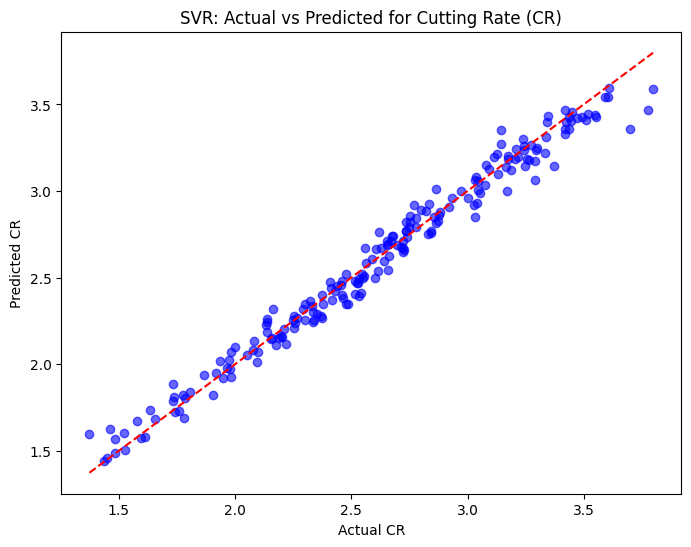

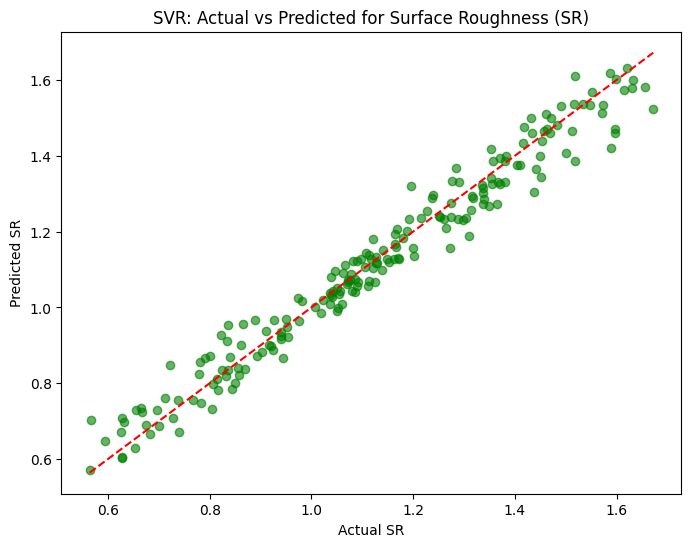

In [6]:
# Cutting Rate (CR) Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_cr_test, y_cr_pred_svr, alpha=0.6, color='blue')
plt.plot([min(y_cr_test), max(y_cr_test)], [min(y_cr_test), max(y_cr_test)], color='red', linestyle='--')
plt.title("SVR: Actual vs Predicted for Cutting Rate (CR)")
plt.xlabel("Actual CR")
plt.ylabel("Predicted CR")
plt.show()

# Surface Roughness (SR) Predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_sr_test, y_sr_pred_svr, alpha=0.6, color='green')
plt.plot([min(y_sr_test), max(y_sr_test)], [min(y_sr_test), max(y_sr_test)], color='red', linestyle='--')
plt.title("SVR: Actual vs Predicted for Surface Roughness (SR)")
plt.xlabel("Actual SR")
plt.ylabel("Predicted SR")
plt.show()

In [8]:
import joblib

In [9]:
joblib.dump(svr_sr, "models/support_vector_regressor_sr.pkl")
joblib.dump(svr_cr, "models/support_vector_regressor_cr.pkl")
print("Exported Support Vector Regression (SVR) Surface Roughness (SR) & Cutting Rate (CR) models")

Exported Support Vector Regression (SVR) Surface Roughness (SR) & Cutting Rate (CR) models


In [ ]:
title of paper
abstract
keywords
introduction ( motivation of research )
literature surveey
research gap
objective 
novelity
materials and methods
result discussion
conclusion and reference